In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Replace '/content/drive/MyDrive/Colab Notebooks/your_folder_name' with your actual path
# !cp -r /content/drive/MyDrive/DATASET
%cd /content/drive/MyDrive/DATASET

/content/drive/MyDrive/DATASET


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow_hub as hub

In [ ]:
# import tensorflow as tf
# import tensorflow_hub as hub
# import numpy as np
# import os
# import cv2
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# import csv

# # Load the MoveNet model
# movenet = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")

# # Define keypoint names and connections
# keypoint_names = ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder',
#                   'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip',
#                   'left_knee', 'right_knee', 'left_ankle', 'right_ankle']

# connections = [(0, 1), (0, 2), (1, 3), (2, 4), (0, 5), (0, 6), (5, 7), (7, 9), (6, 8), (8, 10),
#                 (5, 6), (5, 11), (6, 12), (11, 12), (11, 13), (13, 15), (12, 14), (14, 16)]


# # Function to detect pose and extract keypoints from an image
# def detect_and_extract_keypoints(image_path):
#   image = cv2.imread(image_path)
#   image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#   image_resized = tf.image.resize_with_pad(tf.expand_dims(image_rgb, axis=0), 192, 192)  # 192 for lightning
#   image_np = image_resized.numpy().astype(np.int32)
#   outputs = movenet.signatures["serving_default"](tf.constant(image_np))
#   keypoints = outputs['output_0'].numpy()
#   return keypoints.squeeze(axis=0)  # Remove unnecessary dimensions


# # Function to save keypoints to CSV file
# def save_keypoints_to_csv(keypoints, filename):
#   with open(filename, 'w') as csvfile:
#     csv_writer = csv.writer(csvfile)
#     csv_writer.writerow(keypoint_names)  # Write header row with keypoint names
#     csv_writer.writerow(keypoints.tolist())  # Write keypoint data


# # Function to extract keypoints from all images in a directory
# def extract_keypoints_from_directory(data_dir, save_dir):
#   for pose_class in os.listdir(data_dir):
#     class_dir = os.path.join(data_dir, pose_class)
#     if os.path.isdir(class_dir):
#       save_path = os.path.join(save_dir, pose_class + '.csv')
#       keypoints_list = []
#       for image_file in os.listdir(class_dir):
#         image_path = os.path.join(class_dir, image_file)
#         keypoints = detect_and_extract_keypoints(image_path)
#         keypoints_list.append(keypoints)
#       save_keypoints_to_csv(np.vstack(keypoints_list), save_path)  # Stack keypoints vertically


# # Extract keypoints from train and test directories
# train_data_dir = '/content/drive/MyDrive/DATASET/TRAIN'  # Replace with your train directory path
# test_data_dir = '/content/drive/MyDrive/DATASET/TEST'  # Replace with your test directory path
# train_keypoints_dir = 'train_keypoints'
# test_keypoints_dir = 'test_keypoints'

# # Create directories for saving keypoints if they don't exist
# os.makedirs(train_keypoints_dir, exist_ok=True)
# os.makedirs(test_keypoints_dir, exist_ok=True)

# # Extract keypoints for train data
# extract_keypoints_from_directory(train_data_dir, train_keypoints_dir)

# # Extract keypoints for test data
# extract_keypoints_from_directory(test_data_dir, test_keypoints_dir)

# # (Rest of your code for classification and performance evaluation)


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [ ]:
my_data_dir = r'/content/drive/MyDrive/DATASET'

In [ ]:
os.listdir(my_data_dir)

['TRAIN',
 'TEST',
 'train_keypoints',
 'train_df.csv',
 'test_df.csv',
 'yoga_pose_classifier.h5']

In [ ]:
# check for any corrupted images from image augmentation steps and delete them
# code obtained from https://stackoverflow.com/questions/67505710/pil-unidentifiedimageerror-cannot-identify-image-file-io-bytesio-object
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(my_data_dir).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
        print(img_p)

In [ ]:
#Making another copies of input data to be able to fit the generator in modelling stage
#Kaggle notebook doesn't allow to fit the read-only files from input folder
# from distutils.dir_util import copy_tree
# copy_dir = r'/kaggle/working/working_images/'
# copy_tree(my_data_dir, copy_dir, verbose = 2)
# from IPython.display import clear_output
# clear_output(wait=True)
# print("finished")









In [ ]:
#Confirming number of images to ensure that the images have been loaded properly
splitted_dir = my_data_dir
print("Training folder : ")
category = []
number_images_train = []
for cat in os.listdir(splitted_dir + '/TRAIN'):
    print("Number of " + cat + " images : " + str(len(os.listdir(splitted_dir+'/TRAIN' + '/'+cat))))
    category.append(cat)
    number_images_train.append(len(os.listdir(splitted_dir + '/TRAIN' + '/'+cat)))
print("Total Number of Images : " + str(np.sum(number_images_train)))

print("\n\nTesting folder : ")
category = []
number_images_test = []
for cat in os.listdir(splitted_dir + '/TEST'):
    print("Number of " + cat + " images : " + str(len(os.listdir(splitted_dir+'/TEST' + '/'+cat))))
    category.append(cat)
    number_images_test.append(len(os.listdir(splitted_dir + '/TEST' + '/'+cat)))
print("Total Number of Images : " + str(np.sum(number_images_test)))



Training folder : 
Number of plank images : 266
Number of goddess images : 180
Number of warrior2 images : 252
Number of downdog images : 223
Number of tree images : 160
Total Number of Images : 1081


Testing folder : 
Number of goddess images : 80
Number of plank images : 115
Number of tree images : 69
Number of downdog images : 97
Number of warrior2 images : 109
Total Number of Images : 470


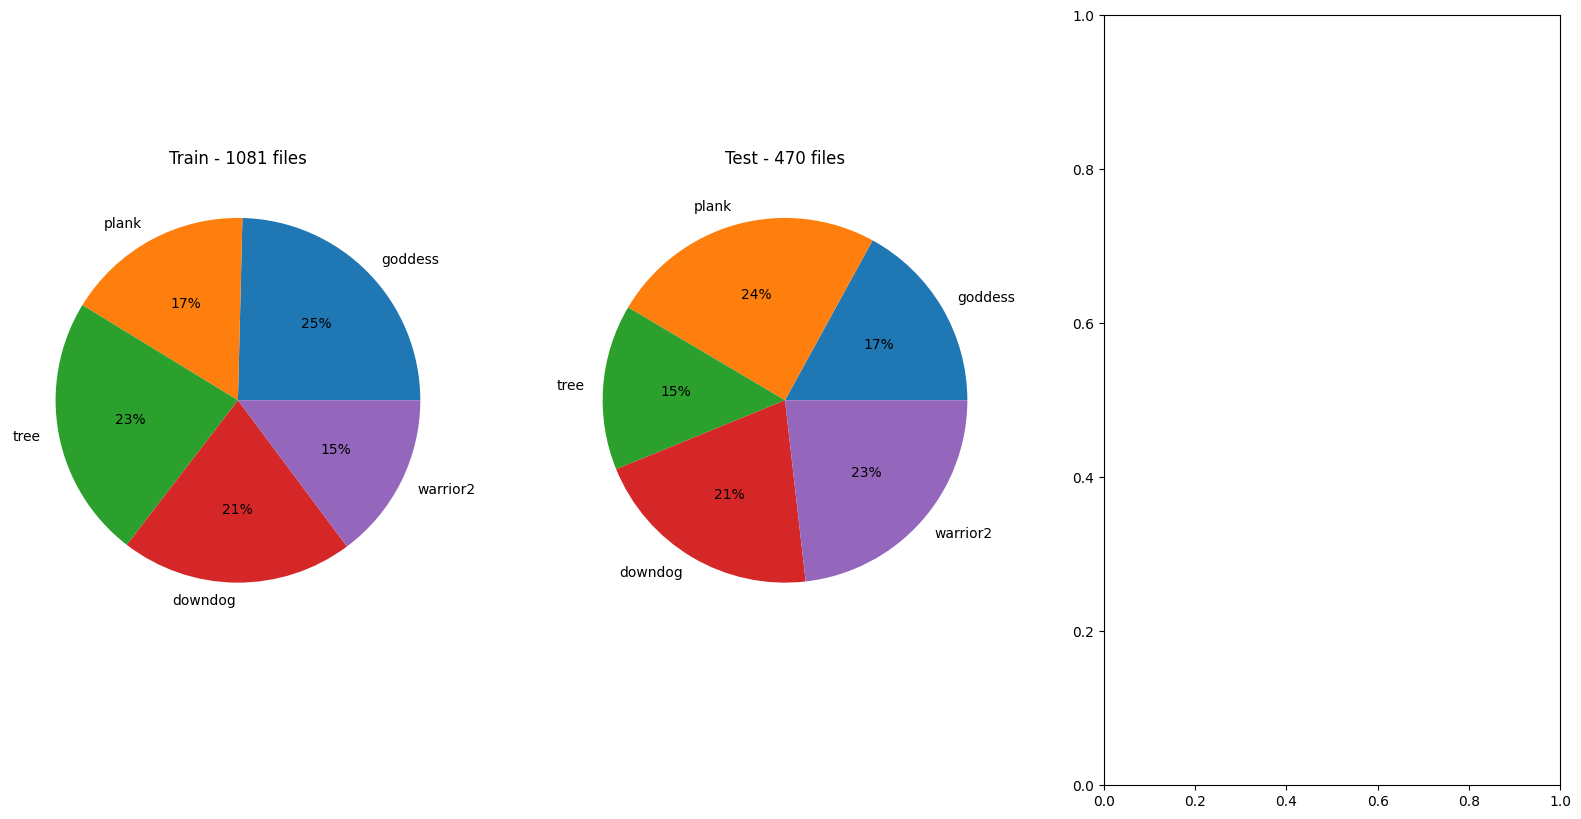

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.pie(number_images_train, labels=category, autopct='%.0f%%')
plt.title(f'Train - {sum(number_images_train)} files')
plt.subplot(1,3,2)
plt.pie(number_images_test, labels=category, autopct='%.0f%%')
plt.title(f'Test - {sum(number_images_test)} files')
plt.subplot(1,3,3)
plt.show()

In [ ]:
!pip install -q imageio
!pip install -q opencv-python
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import cv2

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display

In [ ]:
model_name = "movenet_lightning"

if "tflite" in model_name:
  if "movenet_lightning_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/float16/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/float16/4?lite-format=tflite
    input_size = 256
  elif "movenet_lightning_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/int8/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/int8/4?lite-format=tflite
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_path="model.tflite")
  interpreter.allocate_tensors()

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    # TF Lite format expects tensor type of uint8.
    input_image = tf.cast(input_image, dtype=tf.uint8)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'], input_image.numpy())
    # Invoke inference.
    interpreter.invoke()
    # Get the model prediction.
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    return keypoints_with_scores
else:
  if "movenet_lightning" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
    input_size = 192
  elif "movenet_thunder" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    model = module.signatures['serving_default']

    # SavedModel format expects tensor type of int32.
    input_image = tf.cast(input_image, dtype=tf.int32)
    # Run model inference.
    outputs = model(input_image)
    # Output is a [1, 1, 17, 3] tensor.
    keypoint_with_scores = outputs['output_0'].numpy()
    return keypoint_with_scores

In [ ]:
def draw_prediction_on_image(
     image, keypoints_with_scores, crop_region=None, close_figure=False,
     output_image_height=None):
   """Draws the keypoint predictions on image"""
   height, width, channel = image.shape
   aspect_ratio = float(width) / height
   fig, ax = plt.subplots(figsize=(12 * aspect_ratio, 12))
   # To remove the huge white borders
   fig.tight_layout(pad=0)
   ax.margins(0)
   ax.set_yticklabels([])
   ax.set_xticklabels([])
   plt.axis('off')
   im = ax.imshow(image)
   line_segments = LineCollection([], linewidths=(4), linestyle='solid')
   ax.add_collection(line_segments)
   # Turn off tick labels
   scat = ax.scatter([], [], s=60, color='#FF1493', zorder=3)
   (keypoint_locs, keypoint_edges,
    edge_colors) = _keypoints_and_edges_for_display(
        keypoints_with_scores, height, width)
   line_segments.set_segments(keypoint_edges)
   line_segments.set_color(edge_colors)
   if keypoint_edges.shape[0]:
     line_segments.set_segments(keypoint_edges)
     line_segments.set_color(edge_colors)
   if keypoint_locs.shape[0]:
     scat.set_offsets(keypoint_locs)
   if crop_region is not None:
     xmin = max(crop_region['x_min'] * width, 0.0)
     ymin = max(crop_region['y_min'] * height, 0.0)
     rec_width = min(crop_region['x_max'], 0.99) * width - xmin
     rec_height = min(crop_region['y_max'], 0.99) * height - ymin
     rect = patches.Rectangle(
         (xmin,ymin),rec_width,rec_height,
         linewidth=1,edgecolor='b',facecolor='none')
     ax.add_patch(rect)
   fig.canvas.draw()
   image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
   image_from_plot = image_from_plot.reshape(
       fig.canvas.get_width_height()[::-1] + (3,))
   plt.close(fig)
   if output_image_height is not None:
     output_image_width = int(output_image_height / height * width)
     image_from_plot = cv2.resize(
         image_from_plot, dsize=(output_image_width, output_image_height),
          interpolation=cv2.INTER_CUBIC)
   return image_from_plot

In [ ]:
def _keypoints_and_edges_for_display(keypoints_with_score,height,
                                      width,keypoint_threshold=0.11):
   """Returns high confidence keypoints and edges"""
   keypoints_all = []
   keypoint_edges_all = []
   edge_colors = []
   num_instances,_,_,_ = keypoints_with_score.shape
   for id in range(num_instances):
     kpts_x = keypoints_with_score[0,id,:,1]
     kpts_y = keypoints_with_score[0,id,:,0]
     kpts_scores = keypoints_with_score[0,id,:,2]
     kpts_abs_xy = np.stack(
         [width*np.array(kpts_x),height*np.array(kpts_y)],axis=-1)
     kpts_above_thrs_abs = kpts_abs_xy[kpts_scores > keypoint_threshold,: ]
     keypoints_all.append(kpts_above_thrs_abs)
     for edge_pair,color in KEYPOINT_EDGE_INDS_TO_COLOR.items():
       if (kpts_scores[edge_pair[0]] > keypoint_threshold and
           kpts_scores[edge_pair[1]] > keypoint_threshold):
         x_start = kpts_abs_xy[edge_pair[0],0]
         y_start = kpts_abs_xy[edge_pair[0],1]
         x_end = kpts_abs_xy[edge_pair[1],0]
         y_end = kpts_abs_xy[edge_pair[1],1]
         lien_seg = np.array([[x_start,y_start],[x_end,y_end]])
         keypoint_edges_all.append(lien_seg)
         edge_colors.append(color)
   if keypoints_all:
     keypoints_xy = np.concatenate(keypoints_all,axis=0)
   else:
     keypoints_xy = np.zeros((0,17,2))
   if keypoint_edges_all:
     edges_xy = np.stack(keypoint_edges_all,axis=0)
   else:
     edges_xy = np.zeros((0,2,2))
   return keypoints_xy,edges_xy,edge_colors

In [ ]:
 # Dictionary to map joints of body part
 KEYPOINT_DICT = {
     'nose':0,
     'left_eye':1,
     'right_eye':2,
     'left_ear':3,
     'right_ear':4,
     'left_shoulder':5,
     'right_shoulder':6,
     'left_elbow':7,
     'right_elbow':8,
     'left_wrist':9,
     'right_wrist':10,
     'left_hip':11,
     'right_hip':12,
     'left_knee':13,
     'right_knee':14,
     'left_ankle':15,
     'right_ankle':16
 }

In [ ]:
# map bones to matplotlib color name
KEYPOINT_EDGE_INDS_TO_COLOR = {
     (0,1): 'm',
     (0,2): 'c',
     (1,3): 'm',
     (2,4): 'c',
     (0,5): 'm',
     (0,6): 'c',
     (5,7): 'm',
     (7,9): 'm',
     (6,8): 'c',
     (8,10): 'c',
     (5,6): 'y',
     (5,11): 'm',
     (6,12): 'c',
     (11,12): 'y',
     (11,13): 'm',
     (13,15): 'm',
     (12,14): 'c',
     (14,16): 'c'
 }

In [ ]:
import tensorflow as tf
tree_example_dir =  r'/content/drive/MyDrive/DATASET/TRAIN/downdog/00000128.jpg'
# Load the input image.
image_path = tree_example_dir
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image)

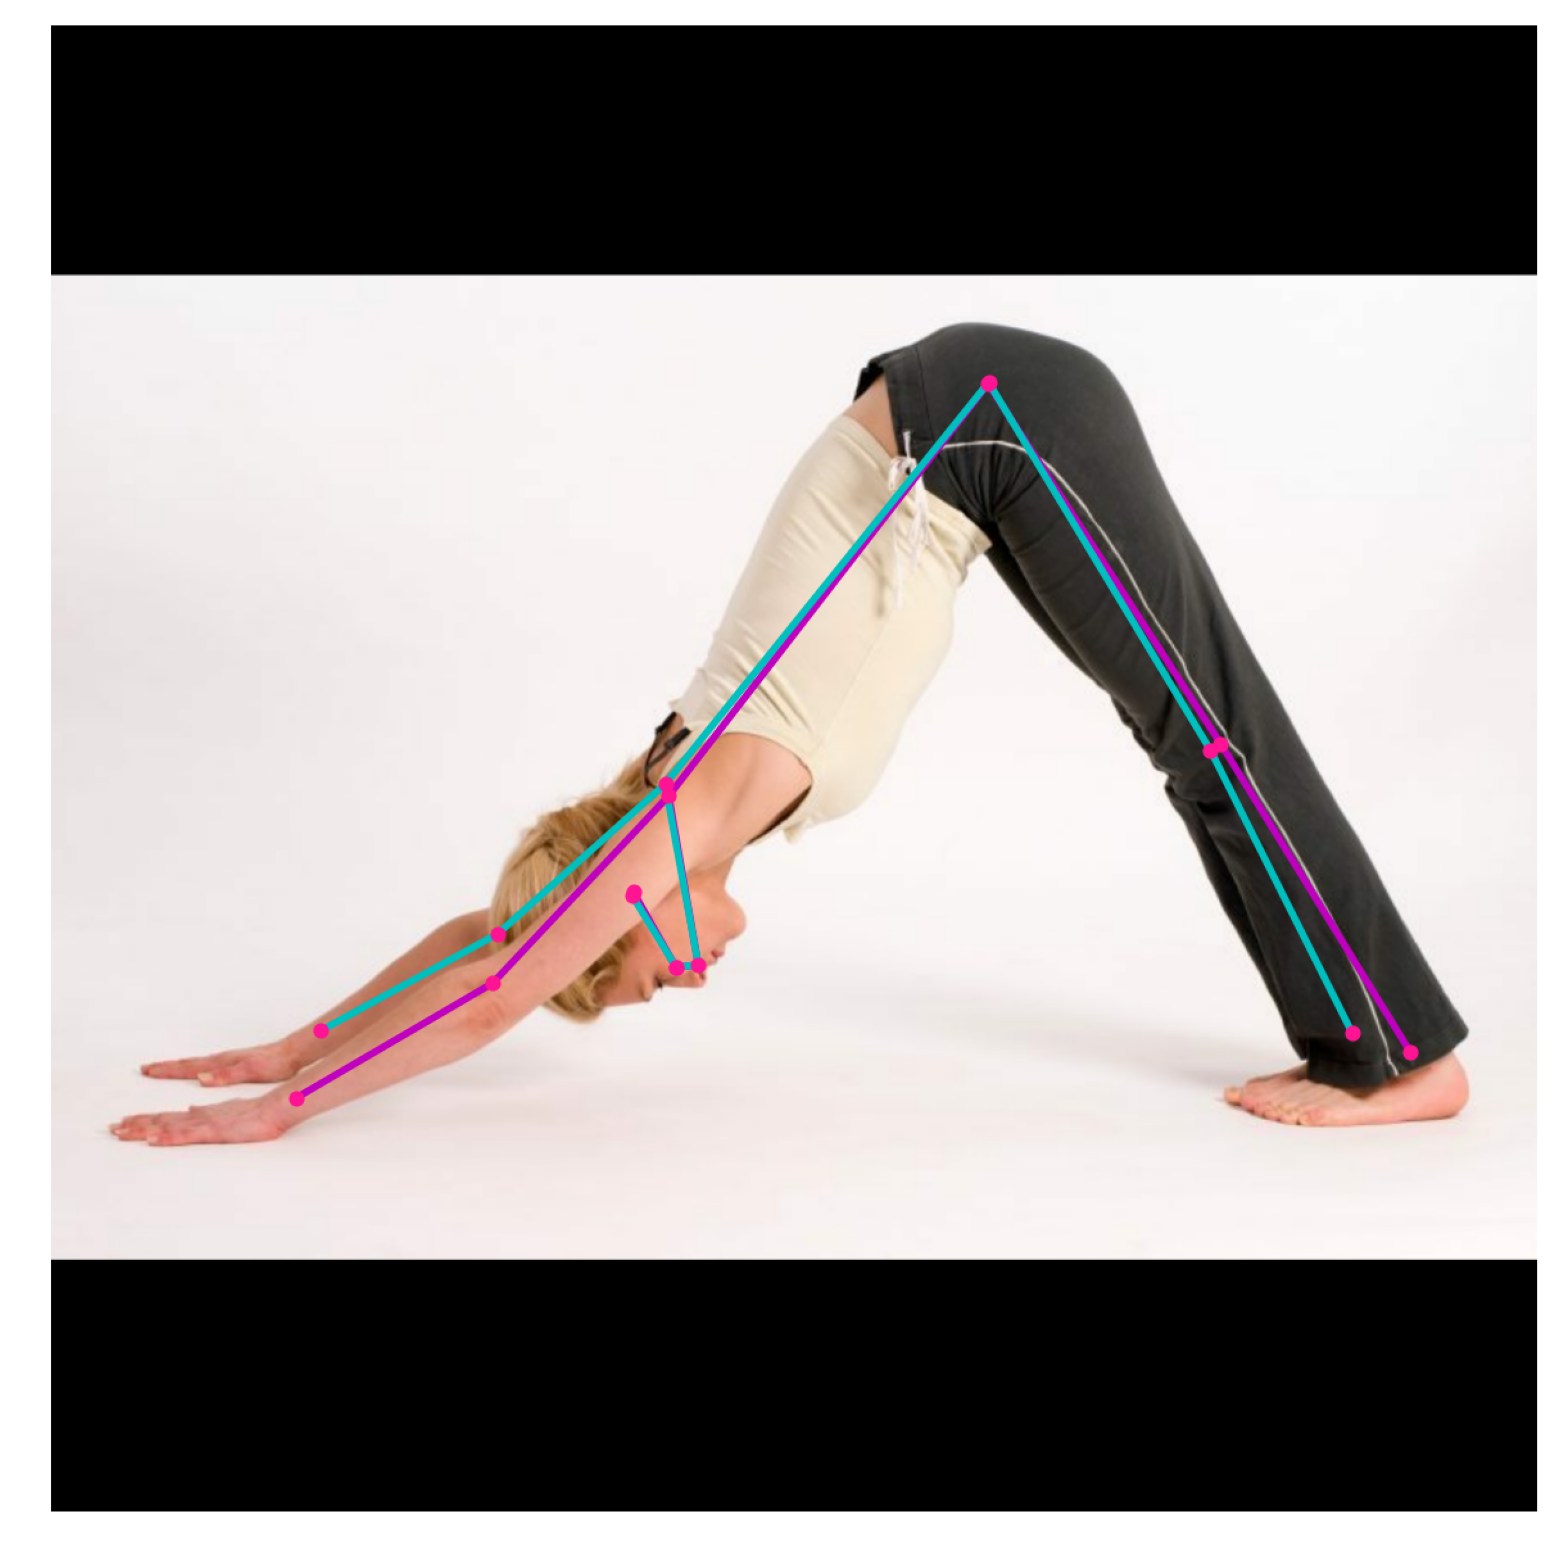

In [ ]:
# Resize and pad the image to keep the aspect ratio and fit the expected size.
input_image = tf.expand_dims(image, axis=0)
input_image = tf.image.resize_with_pad(input_image, input_size, input_size)

# Run model inference.
keypoint_with_scores = movenet(input_image)

# Visualize the predictions with image.
display_image = tf.expand_dims(image, axis=0)
display_image = tf.cast(tf.image.resize_with_pad(
    display_image, 1280, 1280), dtype=tf.int32)
output_overlay = draw_prediction_on_image(
    np.squeeze(display_image.numpy(), axis=0), keypoint_with_scores)

plt.figure(figsize=(20, 20))
plt.imshow(output_overlay)
_ = plt.axis('off')

In [ ]:
keypoint_with_scores.shape

(1, 1, 17, 3)

In [ ]:
keypoint_with_scores # detail of each keypoint is y_coordinate, x_coordinate, score

array([[[[0.6318438 , 0.43564355, 0.56026435],
         [0.6337848 , 0.42065322, 0.67481685],
         [0.63370574, 0.4207909 , 0.72131234],
         [0.5829826 , 0.39194617, 0.6039747 ],
         [0.58523005, 0.39106596, 0.5606221 ],
         [0.5181575 , 0.4157204 , 0.71969664],
         [0.5102452 , 0.4133329 , 0.7187647 ],
         [0.6443177 , 0.297148  , 0.8257503 ],
         [0.6109379 , 0.30076736, 0.656514  ],
         [0.7217628 , 0.16447619, 0.54433733],
         [0.67614996, 0.18173298, 0.5156525 ],
         [0.24060987, 0.6308095 , 0.8962707 ],
         [0.23971906, 0.6311128 , 0.86008614],
         [0.48306662, 0.7873849 , 0.8026249 ],
         [0.48722264, 0.78038025, 0.8259533 ],
         [0.690501  , 0.91496456, 0.69079906],
         [0.677817  , 0.87591314, 0.70765334]]]], dtype=float32)

In [ ]:
# Function to get the keystroke and save to a dataframe
def keypoint_generation(image_path):
    # Load the input image.
    image_path = image_path
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image)
    # Resize and pad the image to keep the aspect ratio and fit the expected size.
    input_image = tf.expand_dims(image, axis=0)
    input_image = tf.image.resize_with_pad(input_image, input_size, input_size)
    # Run model inference
    keypoint_with_scores = movenet(input_image)

    return keypoint_with_scores[0][0]

In [ ]:
#Bruteforce to extract all keypoints into a data frame
def convert_to_df(list_keypoint, cat):
    df = pd.DataFrame(list_keypoint.items(), columns = ['image_name','keypoint'])
    from tqdm.notebook import tqdm_notebook
    nose_y = []
    nose_x = []
    nose_score = []
    left_eye_y = []
    left_eye_x = []
    left_eye_score = []
    right_eye_y = []
    right_eye_x = []
    right_eye_score = []
    left_ear_y = []
    left_ear_x = []
    left_ear_score = []
    right_ear_y = []
    right_ear_x = []
    right_ear_score = []
    left_shoulder_y = []
    left_shoulder_x = []
    left_shoulder_score = []
    right_shoulder_y = []
    right_shoulder_x = []
    right_shoulder_score = []
    left_elbow_y = []
    left_elbow_x = []
    left_elbow_score = []
    right_elbow_y = []
    right_elbow_x = []
    right_elbow_score = []
    left_wrist_y = []
    left_wrist_x = []
    left_wrist_score = []
    right_wrist_y = []
    right_wrist_x = []
    right_wrist_score = []
    left_hip_y = []
    left_hip_x = []
    left_hip_score = []
    right_hip_y = []
    right_hip_x = []
    right_hip_score = []
    left_knee_y = []
    left_knee_x = []
    left_knee_score = []
    right_knee_y = []
    right_knee_x = []
    right_knee_score = []
    left_ankle_y = []
    left_ankle_x = []
    left_ankle_score = []
    right_ankle_y = []
    right_ankle_x = []
    right_ankle_score = []
    for row in tqdm_notebook(df['keypoint']):
        nose_y.append(row[0][0])
        nose_x.append(row[0][1])
        nose_score.append(row[0][2])
        left_eye_y.append(row[1][0])
        left_eye_x.append(row[1][1])
        left_eye_score.append(row[1][2])
        right_eye_y.append(row[2][0])
        right_eye_x.append(row[2][1])
        right_eye_score.append(row[2][2])
        left_ear_y.append(row[3][0])
        left_ear_x.append(row[3][1])
        left_ear_score.append(row[3][2])
        right_ear_y.append(row[4][0])
        right_ear_x.append(row[4][1])
        right_ear_score.append(row[4][2])
        left_shoulder_y.append(row[5][0])
        left_shoulder_x.append(row[5][1])
        left_shoulder_score.append(row[5][2])
        right_shoulder_y.append(row[6][0])
        right_shoulder_x.append(row[6][1])
        right_shoulder_score.append(row[6][2])
        left_elbow_y.append(row[7][0])
        left_elbow_x.append(row[7][1])
        left_elbow_score.append(row[7][2])
        right_elbow_y.append(row[8][0])
        right_elbow_x.append(row[8][1])
        right_elbow_score.append(row[8][2])
        left_wrist_y.append(row[9][0])
        left_wrist_x.append(row[9][1])
        left_wrist_score.append(row[9][2])
        right_wrist_y.append(row[10][0])
        right_wrist_x.append(row[10][1])
        right_wrist_score.append(row[10][2])
        left_hip_y.append(row[11][0])
        left_hip_x.append(row[11][1])
        left_hip_score.append(row[11][2])
        right_hip_y.append(row[12][0])
        right_hip_x.append(row[12][1])
        right_hip_score.append(row[12][2])
        left_knee_y.append(row[13][0])
        left_knee_x.append(row[13][1])
        left_knee_score.append(row[13][2])
        right_knee_y.append(row[14][0])
        right_knee_x.append(row[14][1])
        right_knee_score.append(row[14][2])
        left_ankle_y.append(row[15][0])
        left_ankle_x.append(row[15][1])
        left_ankle_score.append(row[15][2])
        right_ankle_y.append(row[16][0])
        right_ankle_x.append(row[16][1])
        right_ankle_score.append(row[16][2])
    df.insert(loc=0, column='category',value=cat)
    df.insert(loc=3, column='nose_y',value=nose_y)
    df.insert(loc=4, column='nose_x',value=nose_x)
    df.insert(loc=5, column='nose_score',value=nose_score)
    df.insert(loc=6, column='left_eye_y',value=left_eye_y)
    df.insert(loc=7, column='left_eye_x',value=left_eye_x)
    df.insert(loc=8, column='left_eye_score',value=left_eye_score)
    df.insert(loc=9, column='right_eye_y',value=right_eye_y)
    df.insert(loc=10, column='right_eye_x',value=right_eye_x)
    df.insert(loc=11, column='right_eye_score',value=right_eye_score)
    df.insert(loc=12, column='left_ear_y',value=left_ear_y)
    df.insert(loc=13, column='left_ear_x',value=left_ear_x)
    df.insert(loc=14, column='left_ear_score',value=left_ear_score)
    df.insert(loc=15, column='right_ear_y',value=right_ear_y)
    df.insert(loc=16, column='right_ear_x',value=right_ear_x)
    df.insert(loc=17, column='right_ear_score',value=right_ear_score)
    df.insert(loc=18, column='left_shoulder_y',value=left_shoulder_y)
    df.insert(loc=19, column='left_shoulder_x',value=left_shoulder_x)
    df.insert(loc=20, column='left_shoulder_score',value=left_shoulder_score)
    df.insert(loc=21, column='right_shoulder_y',value=right_shoulder_y)
    df.insert(loc=22, column='right_shoulder_x',value=right_shoulder_x)
    df.insert(loc=23, column='right_shoulder_score',value=right_shoulder_score)
    df.insert(loc=24, column='left_elbow_y',value=left_elbow_y)
    df.insert(loc=25, column='left_elbow_x',value=left_elbow_x)
    df.insert(loc=26, column='left_elbow_score',value=left_elbow_score)
    df.insert(loc=27, column='right_elbow_y',value=right_elbow_y)
    df.insert(loc=28, column='right_elbow_x',value=right_elbow_x)
    df.insert(loc=29, column='right_elbow_score',value=right_elbow_score)
    df.insert(loc=30, column='left_wrist_y',value=left_wrist_y)
    df.insert(loc=31, column='left_wrist_x',value=left_wrist_x)
    df.insert(loc=32, column='left_wrist_score',value=left_wrist_score)
    df.insert(loc=33, column='right_wrist_y',value=right_wrist_y)
    df.insert(loc=34, column='right_wrist_x',value=right_wrist_x)
    df.insert(loc=35, column='right_wrist_score',value=right_wrist_score)
    df.insert(loc=36, column='left_hip_y',value=left_hip_y)
    df.insert(loc=37, column='left_hip_x',value=left_hip_x)
    df.insert(loc=38, column='left_hip_score',value=left_hip_score)
    df.insert(loc=39, column='right_hip_y',value=right_hip_y)
    df.insert(loc=40, column='right_hip_x',value=right_hip_x)
    df.insert(loc=41, column='right_hip_score',value=right_hip_score)
    df.insert(loc=42, column='left_knee_y',value=left_knee_y)
    df.insert(loc=43, column='left_knee_x',value=left_knee_x)
    df.insert(loc=44, column='left_knee_score',value=left_knee_score)
    df.insert(loc=45, column='right_knee_y',value=right_knee_y)
    df.insert(loc=46, column='right_knee_x',value=right_knee_x)
    df.insert(loc=47, column='right_knee_score',value=right_knee_score)
    df.insert(loc=48, column='left_ankle_y',value=left_ankle_y)
    df.insert(loc=49, column='left_ankle_x',value=left_ankle_x)
    df.insert(loc=50, column='left_ankle_score',value=left_ankle_score)
    df.insert(loc=51, column='right_ankle_y',value=right_ankle_y)
    df.insert(loc=52, column='right_ankle_x',value=right_ankle_x)
    df.insert(loc=53, column='right_ankle_score',value=right_ankle_score)

    return df

In [ ]:
def gen_keypoint_on_image(image_path):
    import tensorflow as tf
    tree_example_dir =  image_path
    # Load the input image.
    image_path = tree_example_dir
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image)
    # Resize and pad the image to keep the aspect ratio and fit the expected size.
    input_image = tf.expand_dims(image, axis=0)
    input_image = tf.image.resize_with_pad(input_image, input_size, input_size)

    # Run model inference.
    keypoint_with_scores = movenet(input_image)

    # Visualize the predictions with image.
    display_image = tf.expand_dims(image, axis=0)
    display_image = tf.cast(tf.image.resize_with_pad(
        display_image, 1280, 1280), dtype=tf.int32)
    output_overlay = draw_prediction_on_image(
        np.squeeze(display_image.numpy(), axis=0), keypoint_with_scores)

    plt.figure(figsize=(20, 20))
    plt.imshow(output_overlay)
    _ = plt.axis('off')
    return plt, keypoint_with_scores

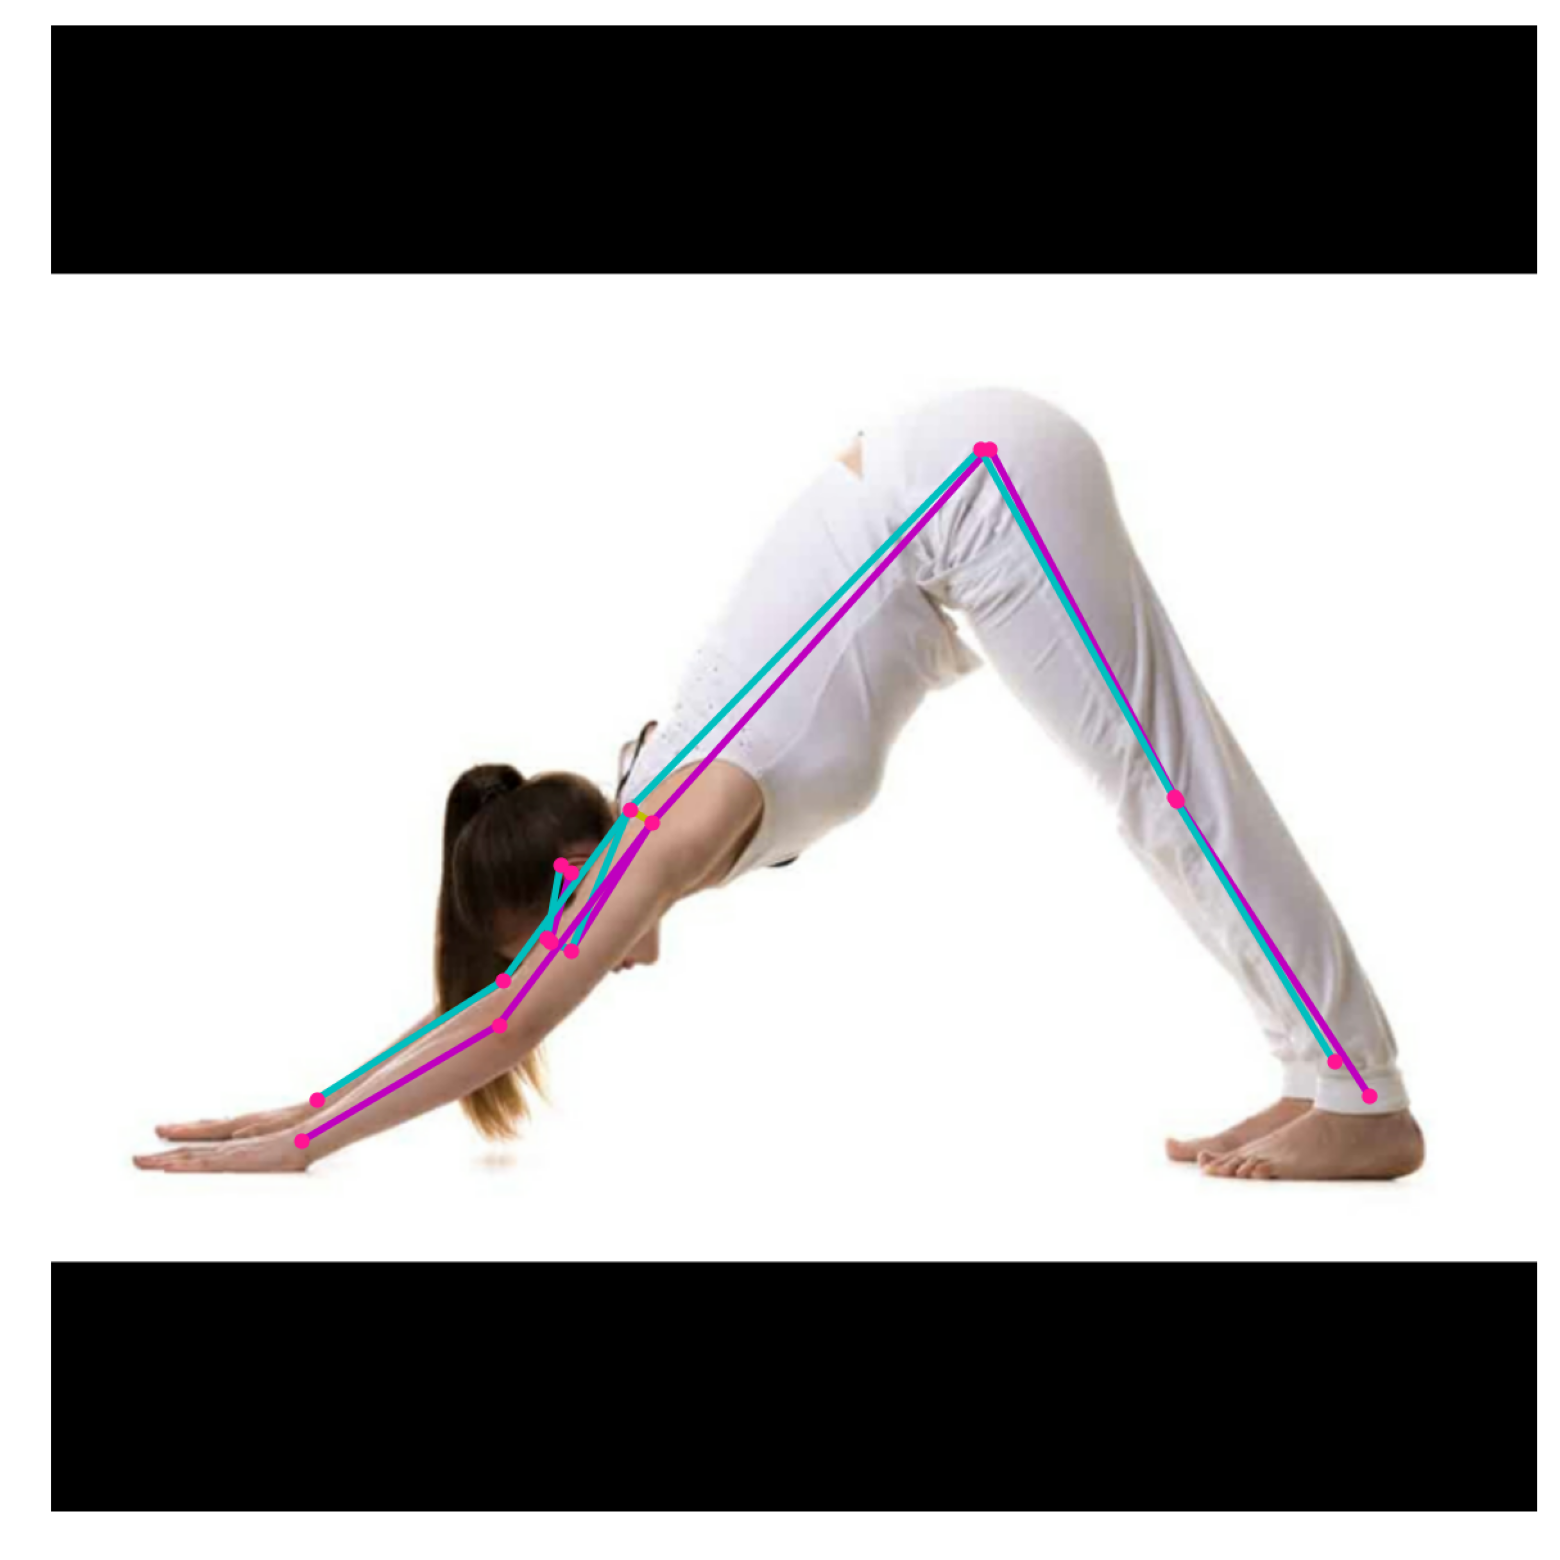

[[[[0.62222373 0.3499413  0.4551786 ]
   [0.6161902  0.33592623 0.44959465]
   [0.61412746 0.3337005  0.5264139 ]
   [0.5696932  0.34960747 0.8183959 ]
   [0.56484574 0.34282383 0.8048958 ]
   [0.53611577 0.4044525  0.83523506]
   [0.52708775 0.3892289  0.7531559 ]
   [0.67243207 0.30124456 0.87328565]
   [0.64237297 0.3043108  0.6640705 ]
   [0.75046694 0.16876715 0.45490766]
   [0.72255313 0.17836654 0.5556723 ]
   [0.28413373 0.63189036 0.90792674]
   [0.2848031  0.625563   0.81437975]
   [0.5213388  0.75797975 0.7866482 ]
   [0.51901203 0.7557155  0.764347  ]
   [0.7200947  0.88745606 0.7956945 ]
   [0.6969144  0.86363953 0.67294425]]]]


In [ ]:
plt, a = gen_keypoint_on_image('/content/drive/MyDrive/DATASET/TRAIN/downdog/00000129.jpg')
plt.show()
print(a)

In [ ]:
# df_by_cat = []
# from tqdm.notebook import tqdm_notebook
# for cat in tqdm_notebook(os.listdir(splitted_dir + '/TRAIN')):
#     list_keypoint = {}
#     list_cat = []
#     for image in os.listdir(splitted_dir + '/TRAIN' + '/' + cat):
#         image_path = splitted_dir + '/TRAIN' + '/' + cat + '/' + image
#         try:
#             list_keypoint[image] = keypoint_generation(image_path)
#             list_cat.append(cat)
#         except:
#             print('Error finding keypoints on Image: ' + image_path)
#             continue
#     df_by_cat.append(convert_to_df(list_keypoint, cat))

# df = pd.concat([df_by_cat[0], df_by_cat[1], df_by_cat[2], df_by_cat[3], df_by_cat[4], df_by_cat[5]], axis = 0)
# df.to_csv("/kaggle/working/train_df.csv")
# df.info()


df_by_cat = []
from tqdm.notebook import tqdm_notebook
for cat in tqdm_notebook(os.listdir(splitted_dir + '/TRAIN')):
    list_keypoint = {}
    list_cat = []
    for image in os.listdir(splitted_dir + '/TRAIN' + '/' + cat):
        image_path = splitted_dir + '/TRAIN' + '/' + cat + '/' + image
        try:
            list_keypoint[image] = keypoint_generation(image_path)
            list_cat.append(cat)
        except:
            print('Error finding keypoints on Image: ' + image_path)
            continue
    df_by_cat.append(convert_to_df(list_keypoint, cat))

# Combine DataFrames from all categories
df = pd.concat(df_by_cat, axis=0)  # Combine DataFrames efficiently

# Convert DataFrame to CSV
# df.to_csv("/kaggle/working/train_df.csv", index=False)  # Save CSV without index
df.to_csv("train_df.csv", index=False)  # Save CSV to current working directory


# Display DataFrame information
df.info()


  0%|          | 0/5 [00:00<?, ?it/s]

Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/plank/00000136.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/plank/00000146.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/plank/00000170.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/plank/00000179.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/plank/00000204.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/plank/00000187.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/plank/00000236.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/plank/00000263.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/plank/00000294.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/plank/00000290.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/plank/00000307.png
Error find

  0%|          | 0/253 [00:00<?, ?it/s]

Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/goddess/00000127.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/goddess/00000193.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/goddess/00000261.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/goddess/00000282.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/goddess/00000272.png


  0%|          | 0/175 [00:00<?, ?it/s]

Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/warrior2/00000123.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/warrior2/00000184.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/warrior2/00000250.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/warrior2/00000287.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/warrior2/00000273.jpg
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/warrior2/00000331.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/warrior2/00000377.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/warrior2/00000416.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/warrior2/00000432.png


  0%|          | 0/243 [00:00<?, ?it/s]

Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/downdog/00000212.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/downdog/00000188.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/downdog/00000245.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/downdog/00000287.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/downdog/00000351.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/downdog/00000352.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/downdog/00000349.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/downdog/00000345.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/downdog/00000379.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/downdog/00000367.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/downdog/0

  0%|          | 0/211 [00:00<?, ?it/s]

Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/tree/00000090.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/tree/00000114.jpg
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/tree/00000140.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/tree/00000131.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/tree/00000157.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/tree/00000145.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/tree/00000154.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/tree/00000200.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TRAIN/tree/00000203.png


  0%|          | 0/151 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
Index: 1033 entries, 0 to 150
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   category              1033 non-null   object 
 1   image_name            1033 non-null   object 
 2   keypoint              1033 non-null   object 
 3   nose_y                1033 non-null   float32
 4   nose_x                1033 non-null   float32
 5   nose_score            1033 non-null   float32
 6   left_eye_y            1033 non-null   float32
 7   left_eye_x            1033 non-null   float32
 8   left_eye_score        1033 non-null   float32
 9   right_eye_y           1033 non-null   float32
 10  right_eye_x           1033 non-null   float32
 11  right_eye_score       1033 non-null   float32
 12  left_ear_y            1033 non-null   float32
 13  left_ear_x            1033 non-null   float32
 14  left_ear_score        1033 non-null   float32
 15  right_ear_y           1033 

In [ ]:

df_by_cat = []
from tqdm.notebook import tqdm_notebook
for cat in tqdm_notebook(os.listdir(splitted_dir + '/TEST')):
    list_keypoint = {}
    list_cat = []
    for image in os.listdir(splitted_dir + '/TEST' + '/' + cat):
        image_path = splitted_dir + '/TEST' + '/' + cat + '/' + image
        try:
            list_keypoint[image] = keypoint_generation(image_path)
            list_cat.append(cat)
        except:
            print('Error finding keypoints on Image: ' + image_path)
            continue
    df_by_cat.append(convert_to_df(list_keypoint, cat))

# Combine DataFrames from all categories
df = pd.concat(df_by_cat, axis=0)  # Combine DataFrames efficiently

# Convert DataFrame to CSV
# df.to_csv("/kaggle/working/train_df.csv", index=False)  # Save CSV without index
df.to_csv("test_df.csv", index=False)  # Save CSV to current working directory


# Display DataFrame information
df.info()


  0%|          | 0/5 [00:00<?, ?it/s]

Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/goddess/00000006.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/goddess/00000038.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/goddess/00000092.png


  0%|          | 0/77 [00:00<?, ?it/s]

Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/plank/00000050.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/plank/00000058.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/plank/00000054.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/plank/00000079.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/plank/00000116.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/plank/00000105.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/plank/00000114.png


  0%|          | 0/108 [00:00<?, ?it/s]

Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/tree/00000019.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/tree/00000047.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/tree/00000068.png


  0%|          | 0/66 [00:00<?, ?it/s]

Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/downdog/00000017.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/downdog/00000010.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/downdog/00000041.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/downdog/00000102.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/downdog/00000075.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/downdog/00000127.png


  0%|          | 0/91 [00:00<?, ?it/s]

Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/warrior2/00000006.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/warrior2/00000025.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/warrior2/00000045.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/warrior2/00000039.png
Error finding keypoints on Image: /content/drive/MyDrive/DATASET/TEST/warrior2/00000115.png


  0%|          | 0/104 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 103
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   category              446 non-null    object 
 1   image_name            446 non-null    object 
 2   keypoint              446 non-null    object 
 3   nose_y                446 non-null    float32
 4   nose_x                446 non-null    float32
 5   nose_score            446 non-null    float32
 6   left_eye_y            446 non-null    float32
 7   left_eye_x            446 non-null    float32
 8   left_eye_score        446 non-null    float32
 9   right_eye_y           446 non-null    float32
 10  right_eye_x           446 non-null    float32
 11  right_eye_score       446 non-null    float32
 12  left_ear_y            446 non-null    float32
 13  left_ear_x            446 non-null    float32
 14  left_ear_score        446 non-null    float32
 15  right_ear_y           446 no

In [ ]:
import pandas as pd
df1 = pd.read_csv('train_df.csv')
df1.head()

,category,image_name,keypoint,nose_y,nose_x,nose_score,left_eye_y,left_eye_x,left_eye_score,right_eye_y,...,left_knee_score,right_knee_y,right_knee_x,right_knee_score,left_ankle_y,left_ankle_x,left_ankle_score,right_ankle_y,right_ankle_x,right_ankle_score
0,plank,00000132.jpg,[[0.47721952 0.7346532 0.5826991 ]\n [0.46089...,0.477220,0.734653,0.582699,0.460899,0.735409,0.580005,0.461643,...,0.760138,0.546021,0.265267,0.635777,0.445589,0.102583,0.646475,0.449165,0.096739,0.593348
1,plank,00000128.jpg,[[0.5938448 0.29933655 0.3356007 ]\n [0.59326...,0.593845,0.299337,0.335601,0.593260,0.285981,0.393385,0.588810,...,0.634380,0.612297,0.667027,0.725030,0.754178,0.631159,0.549713,0.754685,0.634209,0.545260
2,plank,00000129.jpg,[[0.31263366 0.09460646 0.4719743 ]\n [0.32251...,0.312634,0.094606,0.471974,0.322510,0.085739,0.656531,0.324536,...,0.763240,0.543911,0.616412,0.607208,0.603346,0.779659,0.650667,0.622608,0.777042,0.681017
3,plank,00000130.jpg,[[0.5108527 0.263365 0.62387675]\n [0.48222...,0.510853,0.263365,0.623877,0.482223,0.257344,0.449688,0.514465,...,0.561769,0.644169,0.724778,0.665499,0.141660,0.415280,0.376164,0.746711,0.848658,0.863920
4,plank,00000131.jpg,[[0.5409811 0.33131212 0.38321948]\n [0.54201...,0.540981,0.331312,0.383219,0.542020,0.322999,0.465961,0.549542,...,0.322484,0.617982,0.647015,0.396108,0.340732,0.595589,0.260807,0.701343,0.728551,0.479804


In [ ]:
import pandas as pd
df2 = pd.read_csv('test_df.csv')
df2.head()

,category,image_name,keypoint,nose_y,nose_x,nose_score,left_eye_y,left_eye_x,left_eye_score,right_eye_y,...,left_knee_score,right_knee_y,right_knee_x,right_knee_score,left_ankle_y,left_ankle_x,left_ankle_score,right_ankle_y,right_ankle_x,right_ankle_score
0,goddess,00000001.jpg,[[0.3434024 0.5140749 0.6657239 ]\n [0.33310...,0.343402,0.514075,0.665724,0.333107,0.519942,0.557931,0.337088,...,0.749790,0.551747,0.388420,0.747681,0.651854,0.637783,0.530524,0.661236,0.394727,0.397111
1,goddess,00000002.jpeg,[[0.31526762 0.45002645 0.70350623]\n [0.30353...,0.315268,0.450026,0.703506,0.303536,0.469422,0.917318,0.300914,...,0.824065,0.605492,0.240217,0.672009,0.755669,0.637624,0.850770,0.757857,0.247665,0.821570
2,goddess,00000007.jpg,[[0.19092838 0.33473465 0.60764354]\n [0.17520...,0.190928,0.334735,0.607644,0.175208,0.356021,0.674925,0.175514,...,0.609954,0.651076,0.254773,0.127106,0.966978,0.638571,0.308229,0.890826,0.333369,0.558548
3,goddess,00000009.jpg,[[0.19128662 0.51139575 0.7054219 ]\n [0.17878...,0.191287,0.511396,0.705422,0.178783,0.530783,0.882945,0.178622,...,0.945884,0.673680,0.357243,0.894987,0.817925,0.692953,0.845714,0.826881,0.323372,0.812439
4,goddess,00000005.jpg,[[0.3235907 0.5273412 0.71504253]\n [0.31096...,0.323591,0.527341,0.715043,0.310966,0.541569,0.692884,0.312799,...,0.761777,0.568950,0.360275,0.823241,0.705856,0.685946,0.658088,0.711454,0.367211,0.710238


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [ ]:
import pandas as pd
# Load training data
train_data = pd.read_csv("train_df.csv")

# Load testing data
test_data = pd.read_csv("test_df.csv")


In [ ]:
# Separate features and labels for training data
# train_data1 = train_data.drop("image_name")
train_data1 = train_data.drop(columns=["image_name"])


train_features = train_data1.iloc[:, 3:]  # Select features from 'nose_y' column onwards
train_labels = train_data['category']

# Separate features and labels for training data
test_data1 = test_data.drop(columns=["image_name"])

test_features = test_data1.iloc[:, 3:]  # Select features from 'nose_y' column onwards
test_labels = test_data['category']

# Normalize keypoints (assuming width and height columns exist)
# train_features[['x', 'y']] = train_features[['x', 'y']] / train_data[['width', 'height']]
# test_features[['x', 'y']] = test_features[['x', 'y']] / test_data[['width', 'height']]  # Normalize test data

# One-Hot Encode labels (assuming training data has labels)
encoder = OneHotEncoder(sparse=False)
train_labels = encoder.fit_transform(train_labels.values.reshape(-1, 1))
test_labels = encoder.fit_transform(test_labels.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=train_features.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(encoder.categories_[0]), activation='softmax'))  # Output size based on class count


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2)


In [ ]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/40
26/26 [==============================] - 1s 14ms/step - loss: 1.4936 - accuracy: 0.3584 - val_loss: 1.3728 - val_accuracy: 0.4203
Epoch 2/40
26/26 [==============================] - 0s 5ms/step - loss: 1.2665 - accuracy: 0.4831 - val_loss: 1.1270 - val_accuracy: 0.4976
Epoch 3/40
26/26 [==============================] - 0s 4ms/step - loss: 1.0633 - accuracy: 0.5702 - val_loss: 0.9548 - val_accuracy: 0.6232
Epoch 4/40
26/26 [==============================] - 0s 5ms/step - loss: 0.9306 - accuracy: 0.6199 - val_loss: 0.8783 - val_accuracy: 0.7295
Epoch 5/40
26/26 [==============================] - 0s 7ms/step - loss: 0.8675 - accuracy: 0.6634 - val_loss: 0.8501 - val_accuracy: 0.7246
Epoch 6/40
26/26 [==============================] - 0s 7ms/step - loss: 0.8320 - accuracy: 0.6671 - val_loss: 0.7551 - val_accuracy: 0.7536
Epoch 7/40
26/26 [==============================] - 0s 7ms/step - loss: 0.7663 - accuracy: 0.6973 - val_loss: 0.7489 - val_accuracy: 0.7681
Epoch 8/40
26/26 [=

In [ ]:
if test_labels is not None:
  test_loss, test_acc = model.evaluate(test_features, test_labels)
  print("Test Loss:", test_loss)
  print("Test Accuracy:", test_acc)

14/14 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.9260
Test Loss: 0.2351313978433609
Test Accuracy: 0.926008939743042


In [ ]:
model.save("yoga_pose_classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               13056     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 46597 (182.02 KB)
Trainable params: 46597 (182.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


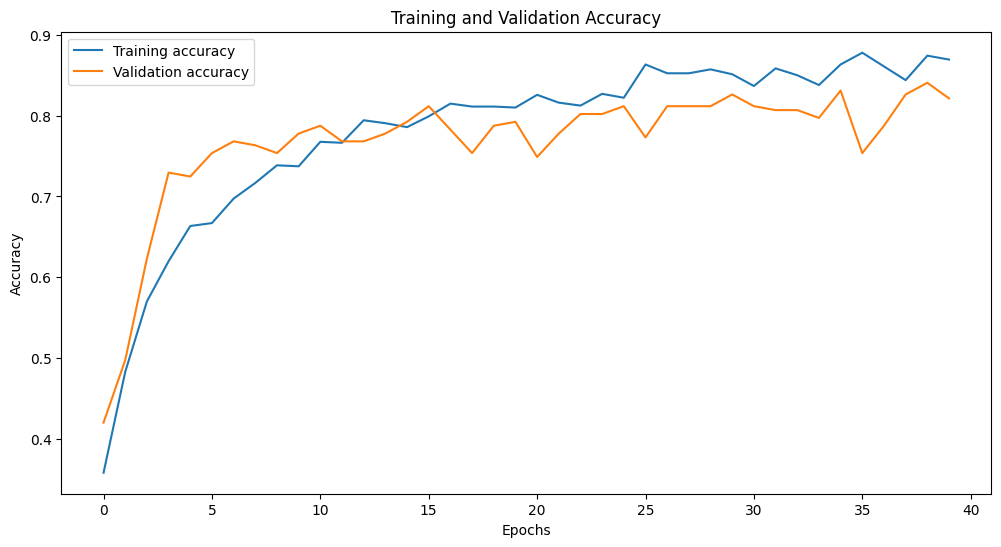

In [ ]:
import matplotlib.pyplot as plt

# Plotting training, validation accuracy
# Plotting training, validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


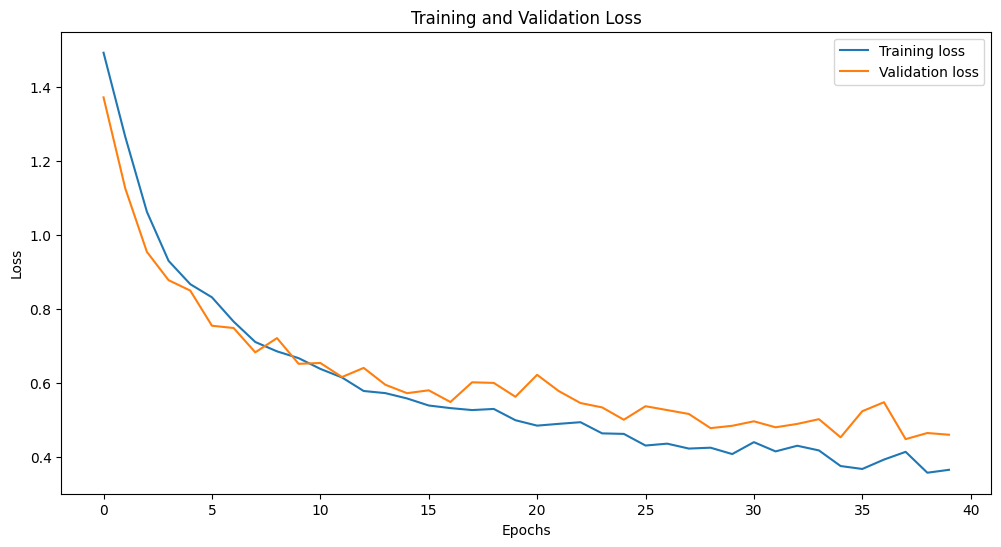

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Obtain predictions from the model
predictions = model.predict(test_features)

# Convert predictions to classes
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels back to categorical labels
true_labels = np.argmax(test_labels, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_classes)

# Calculate precision
precision = precision_score(true_labels, predicted_classes, average='weighted')

# Calculate recall
recall = recall_score(true_labels, predicted_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(true_labels, predicted_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


14/14 [==============================] - 0s 2ms/step
Accuracy: 0.9260089686098655
Precision: 0.9300658441596933
Recall: 0.9260089686098655
F1 Score: 0.9268740481931024


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(true_labels, predicted_classes)

# Print classification report
print(report)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        91
           1       0.76      0.87      0.81        77
           2       0.99      0.98      0.99       108
           3       0.96      0.97      0.96        66
           4       0.91      0.83      0.87       104

    accuracy                           0.93       446
   macro avg       0.92      0.93      0.92       446
weighted avg       0.93      0.93      0.93       446



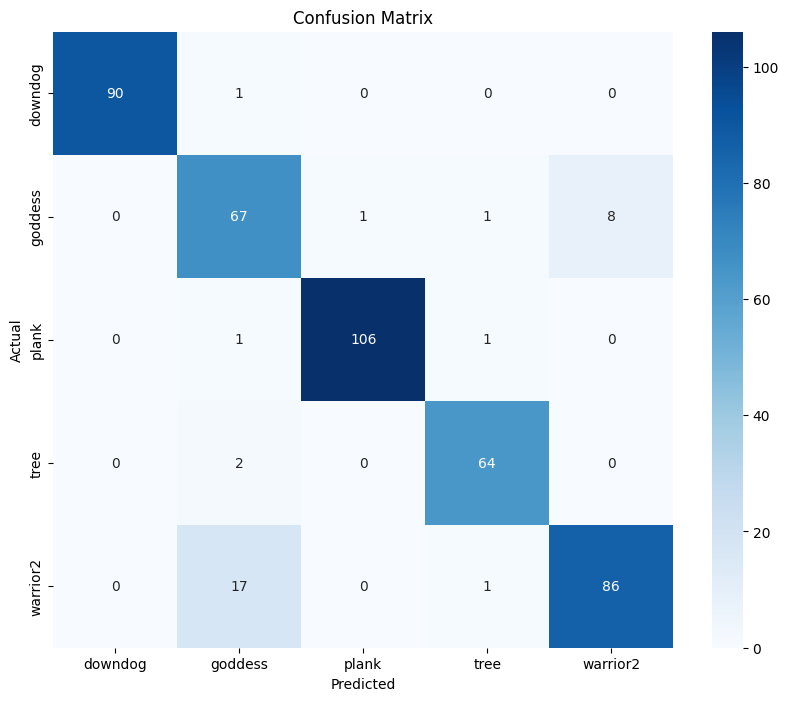

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
